# sector 3

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s3.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

75411 after maybeTransit, 33.54835552510644% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
10,/tmp/tess/tesslcs_sector_3_104/2_min_cadence_t...,206405739,-4.94325,-4.57979,1391.55482,0.72758,0.00000,230.70375,29.94511,1.483835e+12,...,25.47898,33.73341,1.27395,1.68667,0.00037,0.00043,0.00028,0.00034,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
13,/tmp/tess/tesslcs_sector_3_104/2_min_cadence_t...,150271169,-4.83342,-3.76116,1388.88581,0.97708,0.00011,0.39572,22.94202,5.853962e+01,...,51.84294,53.84866,1.62009,1.68277,0.00016,0.00016,0.00014,0.00014,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
19,/tmp/tess/tesslcs_sector_3_104/2_min_cadence_t...,396720311,-10.56487,-3.78305,1400.30413,0.72384,0.00000,46.99768,-1.16659,0.000000e+00,...,277.20291,393.53280,1.63061,2.31490,0.00028,0.00033,0.00022,0.00026,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
20,/tmp/tess/tesslcs_sector_3_104/tesslcs_tmag_10...,219223924,-7.85113,-3.26369,1391.57522,0.99950,0.00029,0.13766,-0.00221,2.521131e+05,...,68.76540,68.73650,0.79960,0.79926,0.00030,0.00030,0.00024,0.00024,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
21,/tmp/tess/tesslcs_sector_3_104/2_min_cadence_t...,290169946,-11.13417,-3.17117,1399.20355,0.79482,0.00000,335.38417,-29.99997,0.000000e+00,...,12840.69534,16357.85903,87.94997,112.04013,0.00113,0.00127,0.00086,0.00104,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

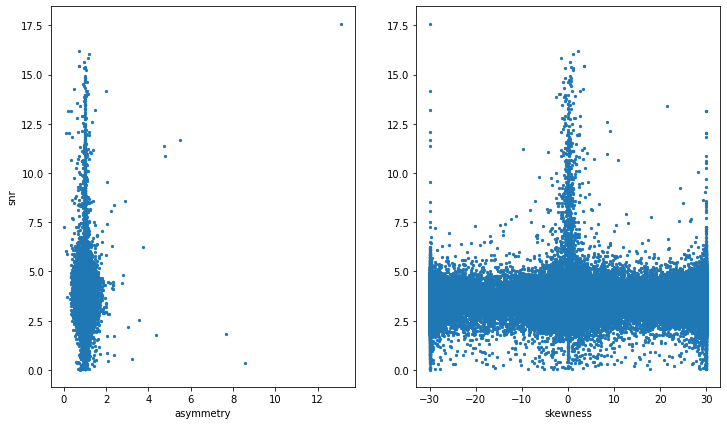

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

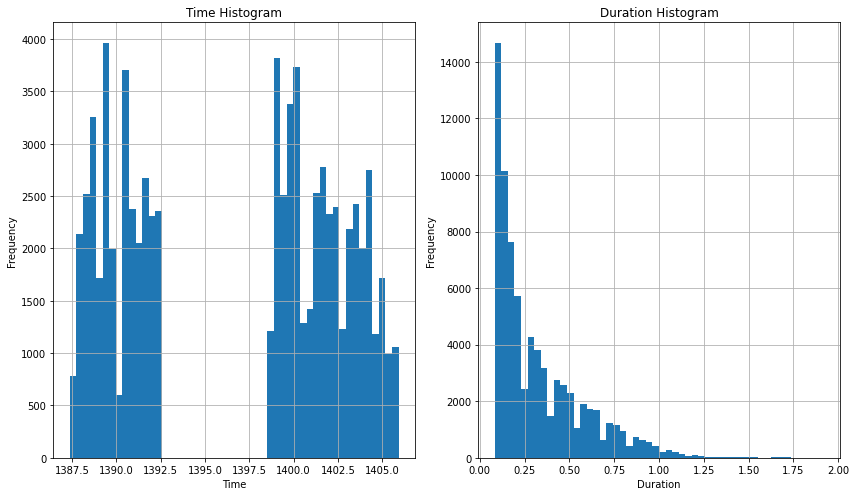

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

2290

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

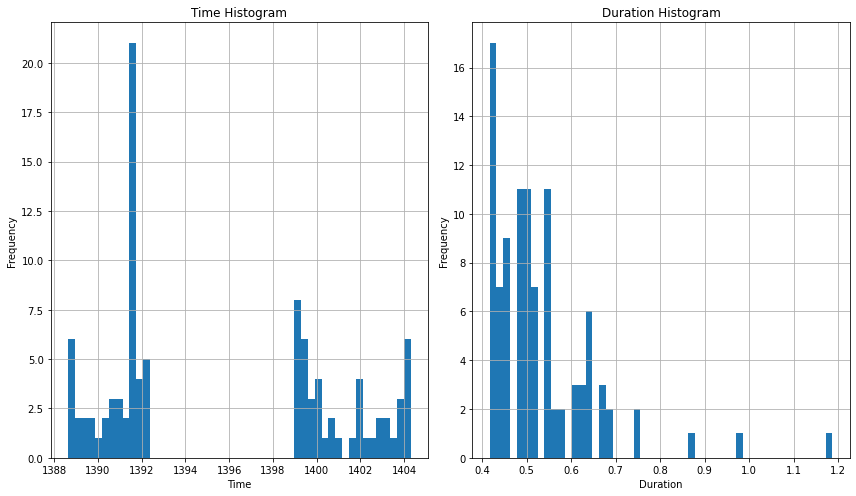

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

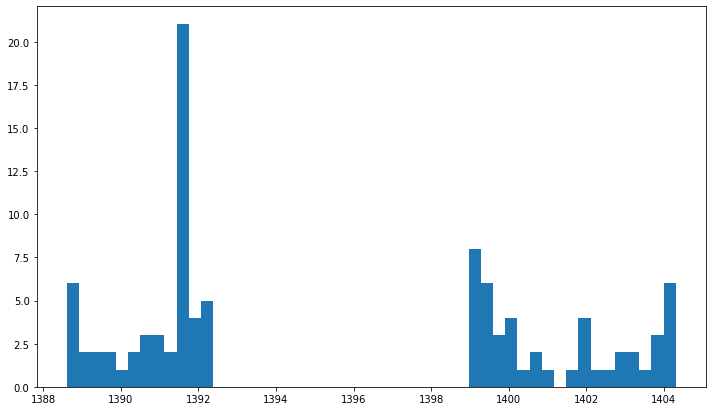

In [13]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [14]:
hist_values

array([ 6.,  2.,  2.,  2.,  1.,  2.,  3.,  3.,  2., 21.,  4.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  3.,  4.,  1.,  2.,
        1.,  0.,  1.,  4.,  1.,  1.,  2.,  2.,  1.,  3.,  6.])

In [16]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [15]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1391.4397152 start of bin
1391.753508 end of bin
21.0 number of lcs


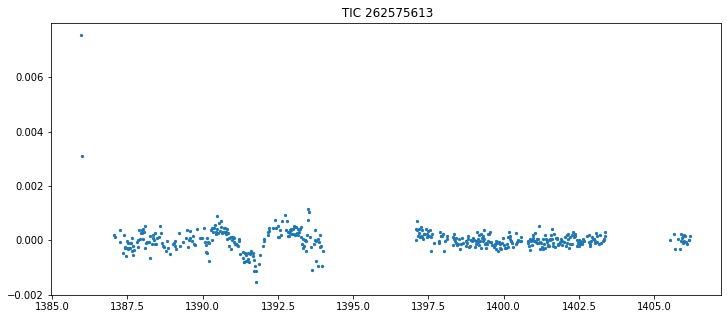

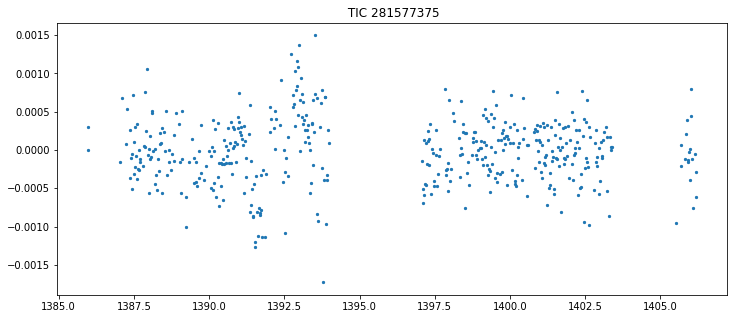

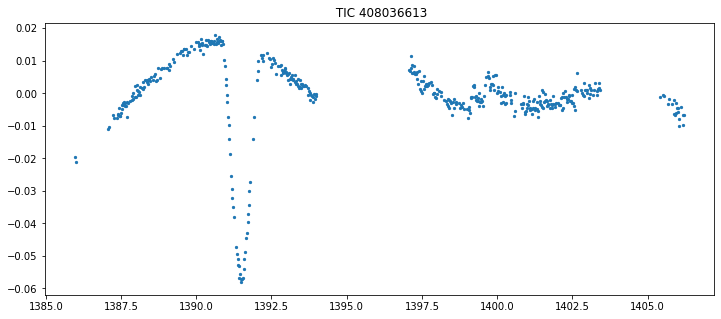

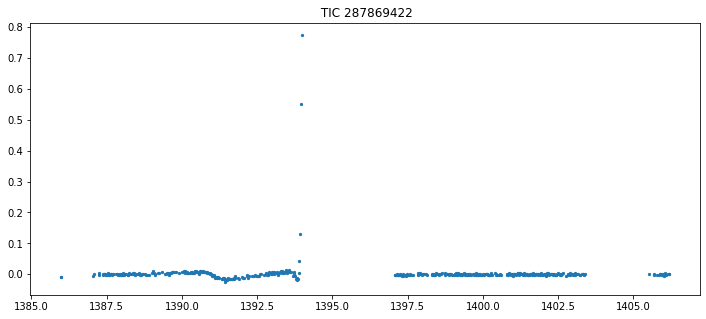

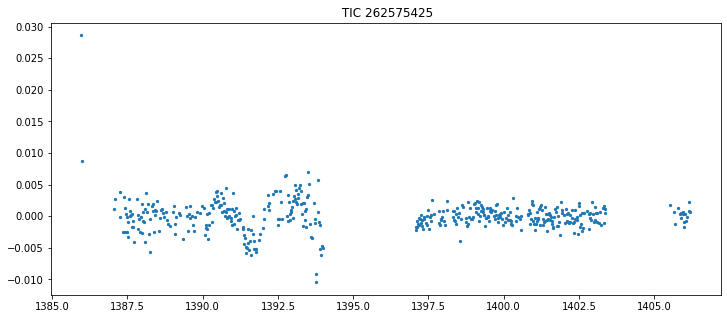

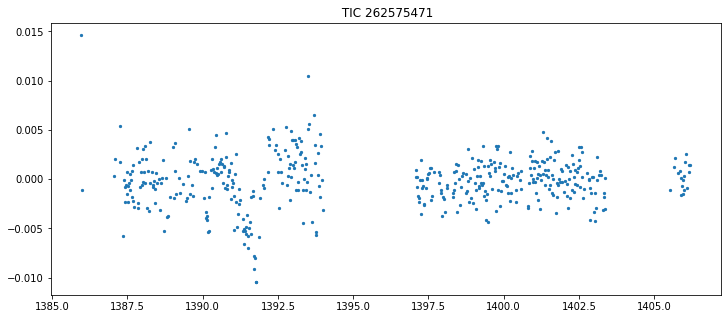

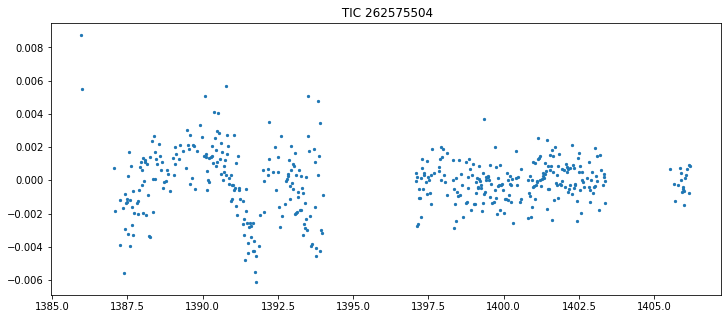

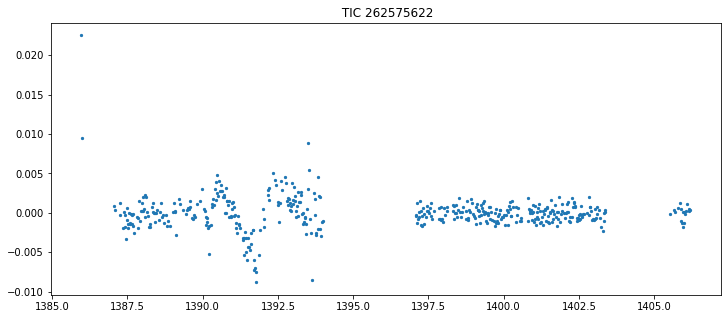

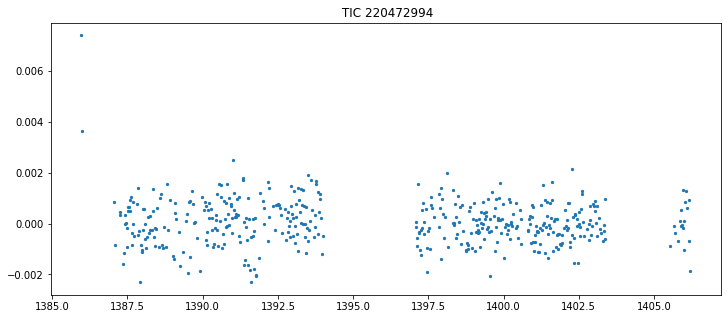

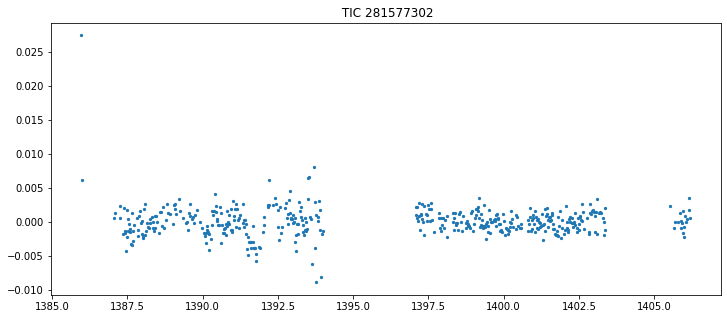

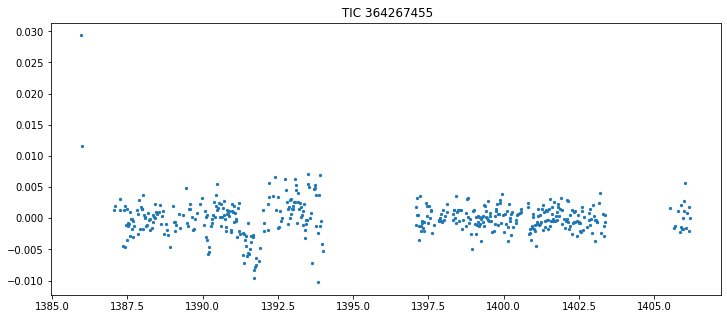

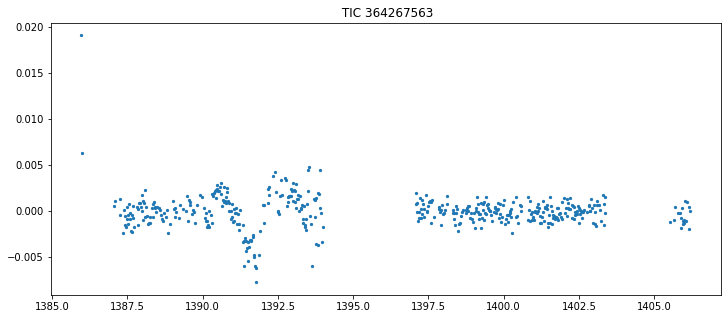

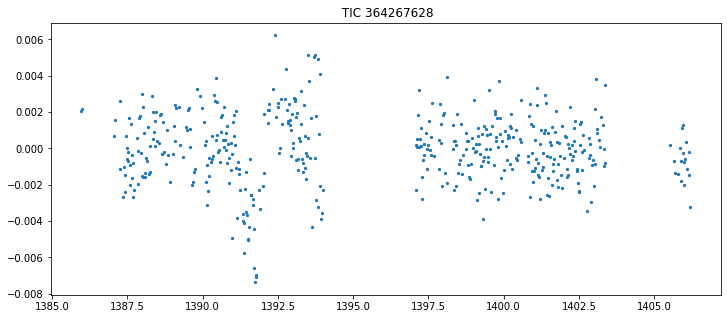

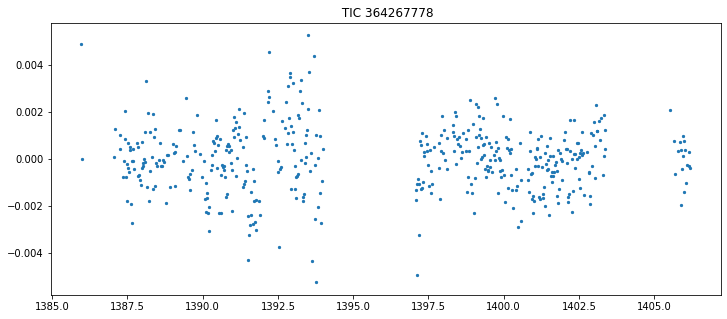

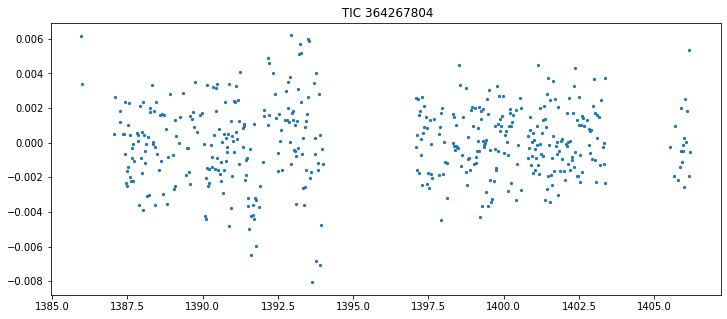

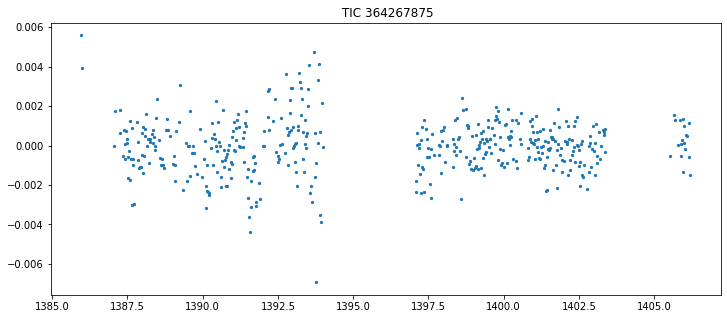

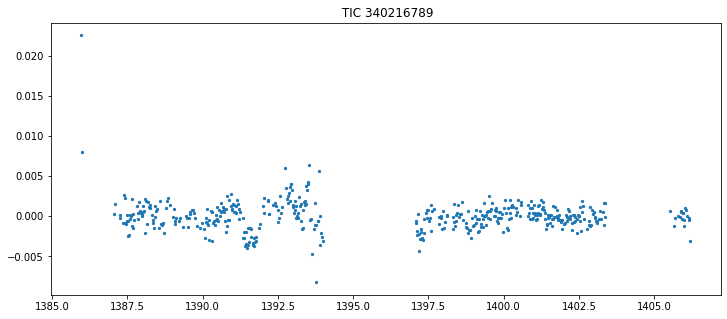

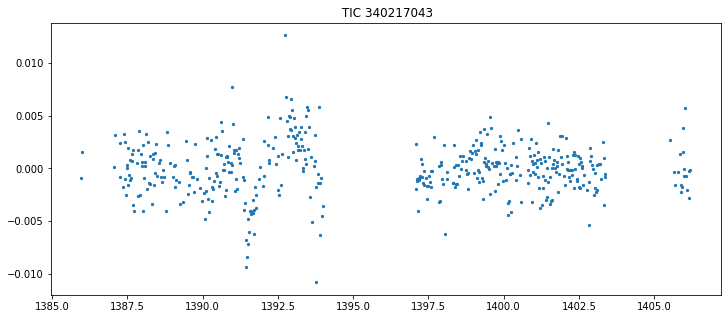

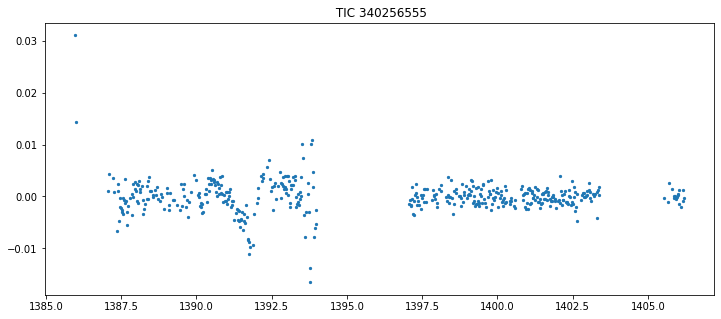

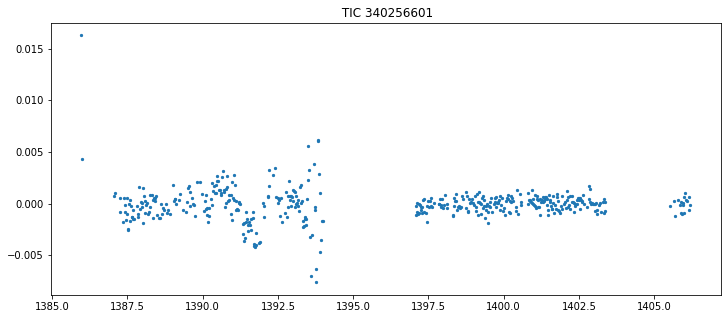

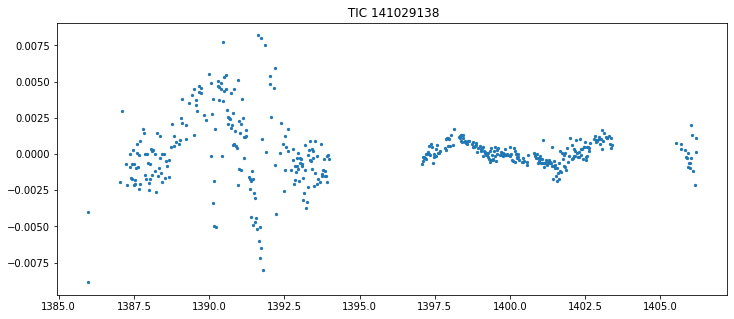

In [16]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()